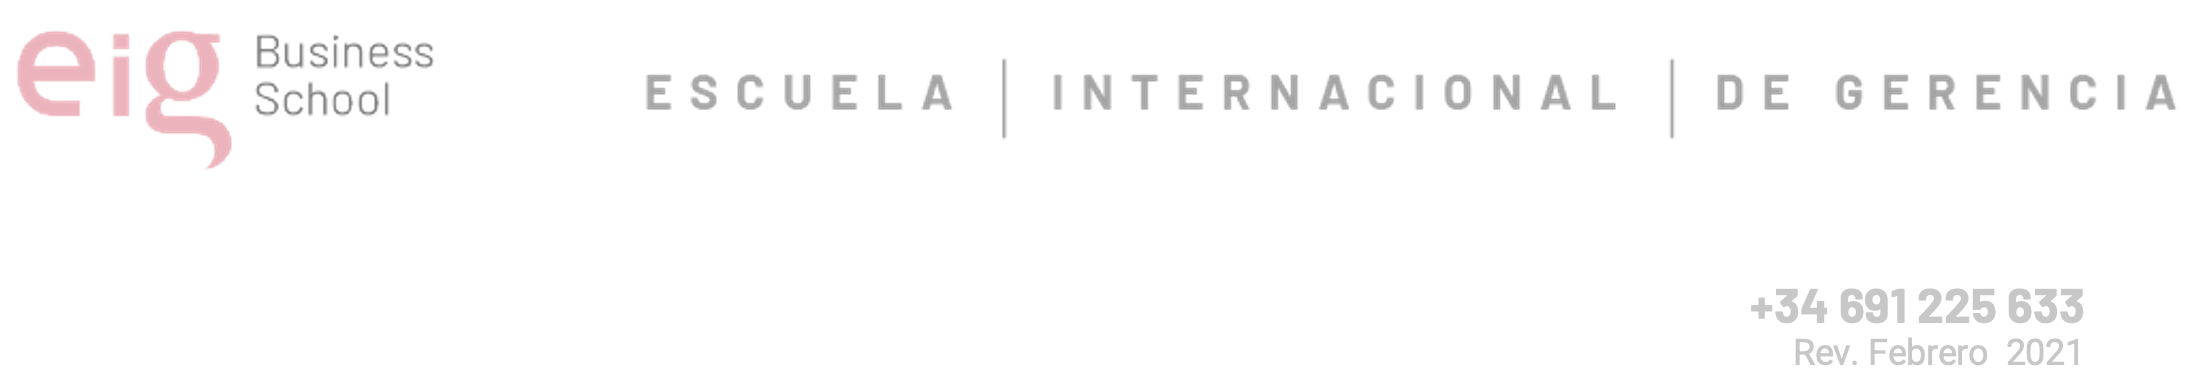

Autor:  
Manuel Eugenio Morocho Cayamcela, PhD

# **Lectura 3.2:** 
## Predicción de diabetes utilizando una red neuronal

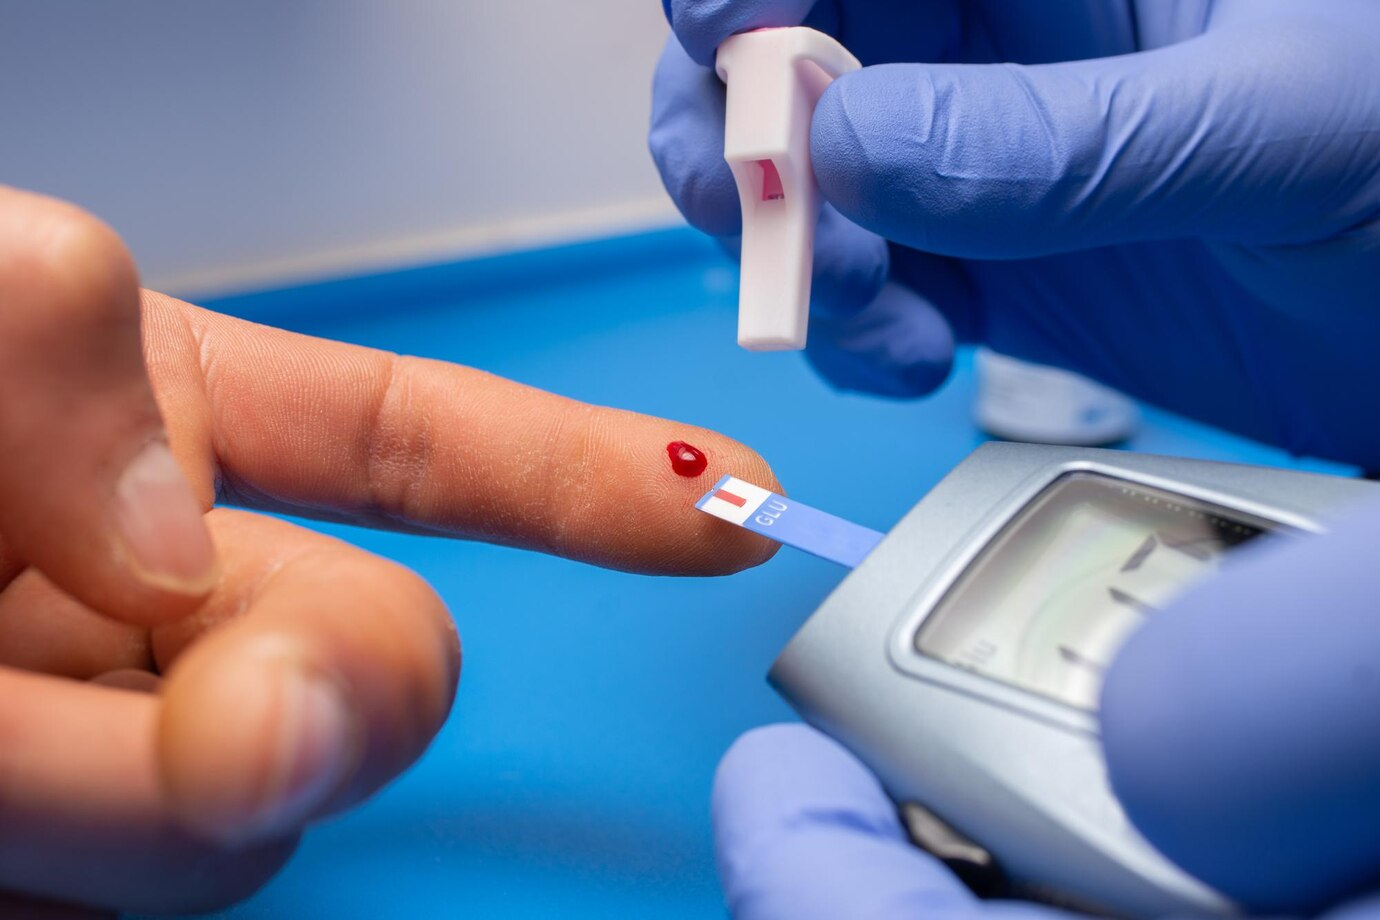

### **Introducción:** 

En esta lectura, se realiza un análisis y modelado de un conjunto de datos de diabetes. Comienza con el preprocesamiento de datos, donde se reemplazan los valores faltantes (NaN) en el DataFrame `diabetes_df` con la media de cada columna, y se discute la posibilidad de eliminar los valores atípicos. Luego, se realiza un análisis exploratorio de datos utilizando una matriz de correlación y un mapa de calor para visualizar las relaciones entre las diferentes características, y se crea una matriz de gráficos de dispersión para visualizar las relaciones entre pares de características. A continuación, se instalan las bibliotecas scikit-learn y TensorFlow para el modelado de machine learning. Finalmente, se entrena un modelo de red neuronal utilizando TensorFlow en un conjunto de datos de entrenamiento.

Una red neuronal es un modelo de machine learning inspirado en el cerebro humano. Consiste en una serie de nodos, o "neuronas", organizados en capas. Cada neurona recibe una serie de entradas, las pondera en función de unos pesos (que son los parámetros que el modelo aprenderá), y luego pasa la suma ponderada a través de una función de activación para producir una salida.

El entrenamiento de una red neuronal implica ajustar los pesos de la red para minimizar la diferencia entre las predicciones del modelo y los valores reales. Esto se hace a través de un proceso llamado retropropagación y un algoritmo de optimización como el descenso de gradiente.

### **Contenido:**

#### Cargamos el dataset

1. Importa la biblioteca pandas, que es una herramienta poderosa para la manipulación, análisis, y minería de datos en Python.

2. Utiliza la función `read_csv()` de pandas para cargar un archivo CSV llamado 'diabetes.csv' en un DataFrame de pandas. El archivo se encuentra en la ruta especificada.

3. Utiliza el método `head()` para mostrar las primeras 5 filas del DataFrame. Esto es útil para obtener una vista rápida de los datos después de cargarlos.

El DataFrame resultante, `diabetes_df`, contiene los datos del archivo 'diabetes.csv' y puede ser utilizado para análisis y modelado de datos.

In [1]:
# Importamos la librería pandas
import pandas as pd

# Cargamos el dataset diabetes.csv
diabetes_df = pd.read_csv('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/Bases de Datos/diabetes.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


El conjunto de datos de diabetes contiene las siguientes variables:

1. `pregnancies`: Número de veces que la persona ha estado embarazada.
2. `glucose`: Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
3. `diastolic`: Presión arterial diastólica (mm Hg).
4. `triceps`: Espesor del pliegue de la piel del tríceps (mm).
5. `insulin`: Suero de insulina de 2 horas (mu U/ml).
6. `bmi`: Índice de masa corporal (peso en kg/(altura en m)^2).
7. `dpf`: Pedigree de la función de la diabetes, una función que puntúa la probabilidad de diabetes en función de la historia familiar.
8. `age`: Edad (años).
9. `diabetes`: Variable de clase (0 o 1) donde '1' denota que el paciente tiene diabetes y '0' denota que el paciente no tiene diabetes.

Estas variables se utilizan para predecir si un paciente tiene diabetes o no.

#### Buscamos si existen valores de tipo 'null' en la base de datos

In [2]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Graficamos el rango de valores de cada columna del DataFrame diabetes_df

1. Importa la biblioteca matplotlib, que es una biblioteca de Python para la creación de gráficos estáticos, animados e interactivos.

2. Crea una nueva figura y un conjunto de subtramas. Esto proporciona un lienzo en el que puedes dibujar tus gráficos.

3. Utiliza el método `boxplot()` del DataFrame `diabetes_df` para crear un gráfico de caja para cada columna. Un gráfico de caja muestra la mediana, los cuartiles y los valores atípicos de cada columna, lo que te permite ver la distribución y el rango de valores de cada columna.

4. Utiliza `plt.xticks(rotation=90)` para rotar los nombres de las columnas 90 grados. Esto hace que los nombres de las columnas sean más legibles cuando tienes muchas columnas.

5. Utiliza `plt.show()` para mostrar el gráfico. Esto es necesario porque matplotlib requiere que llames a `show()` para que se muestre el gráfico.

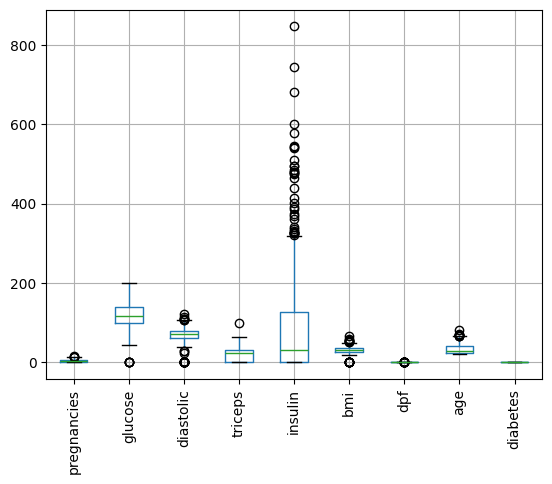

In [3]:
# Importamos la librería matplotlib
import matplotlib.pyplot as plt

# Creamos una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Hacemos un gráfico de caja para cada columna
diabetes_df.boxplot(ax=ax)

# Rotamos los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.show()

#### Reemplazamos los valores 0 por NaN

Esto se hace porque en este contexto, un valor de 0 en ciertas columnas puede no ser válido o puede indicar datos faltantes. Al reemplazar los 0s por NaNs, estos valores pueden ser tratados adecuadamente como datos faltantes en los análisis posteriores.

En el conjunto de datos de diabetes, un valor de 0 en las columnas 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi' puede no ser válido o puede indicar datos faltantes. Por ejemplo, es poco probable que una persona tenga 0 de presión diastólica o 0 de glucosa, ya que estos son indicadores vitales.

Por otro lado, un valor de 0 en otras columnas como 'pregnancies' puede ser perfectamente válido (una mujer puede no haber estado embarazada nunca) y por lo tanto no debería ser tratado como un valor faltante.

Por lo tanto, se reemplazan los 0s por NaNs solo en las columnas donde un 0 probablemente indica un valor faltante o erróneo.

1. Importa la biblioteca `numpy`, que es una biblioteca de Python para trabajar con arrays.

2. Reemplaza los valores 0 por NaN (Not a Number) en las columnas 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', y 'BMI' del DataFrame `diabetes_df`. 

In [5]:
# Importamos la librería numpy
import numpy as np

# Reemplazamos los valores 0 por NaN
diabetes_df[['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']] = diabetes_df[['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']].replace(0, np.NaN)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#### Reemplazamos los valores NaN por la media

1. Utiliza el método `fillna()` del DataFrame `diabetes_df` para reemplazar todos los valores NaN (Not a Number) en el DataFrame. Los valores NaN suelen indicar datos faltantes.

2. El primer argumento para `fillna()`, `diabetes_df.mean()`, es un DataFrame que contiene la media de cada columna en `diabetes_df`. Por lo tanto, este código reemplaza cada valor NaN con la media de su columna.

3. El argumento `inplace = True` indica que los cambios deben hacerse en el DataFrame `diabetes_df` existente, en lugar de crear un nuevo DataFrame.

Después de ejecutar este código, `diabetes_df` ya no contendrá ningún valor NaN. En su lugar, los datos faltantes habrán sido imputados con la media de su respectiva columna.

In [ ]:
# Reemplazamos los valores NaN por la media
diabetes_df.fillna(diabetes_df.mean(), inplace = True)

# Mostramos los primeros registros
diabetes_df.head()

#### Eliminación los datos atípicos (outliers)

La decisión de eliminar o no los valores atípicos depende del contexto y del conocimiento del dominio. En el caso del conjunto de datos de diabetes, los valores atípicos pueden ser legítimos. Por ejemplo, es posible que algunas personas tengan niveles de glucosa o presión arterial significativamente diferentes a la media.

Eliminar estos valores atípicos podría resultar en la pérdida de información importante. Además, algunos modelos de machine learning son sensibles a los valores atípicos, mientras que otros pueden manejarlos bien. Por ejemplo, las redes neuronales, pueden ser bastante resistentes a los valores atípicos.

Por lo tanto, la decisión de eliminar o no los valores atípicos debe basarse en un análisis cuidadoso de los datos y en el conocimiento del dominio. Si se decide eliminar los valores atípicos, debemos asegurarnos de documentar este paso en nuestro proceso de análisis de datos.

Para este ejemplo, no eliminaremos los datos atípicos.

#### Graficamos la correlación entre variables

1. Importa la biblioteca seaborn, que es una biblioteca de visualización de datos en Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

2. Utiliza el método `corr()` del DataFrame `diabetes_df` para calcular la correlación entre todas las parejas de columnas. Esto devuelve un nuevo DataFrame donde el valor en la i-ésima fila y la j-ésima columna es la correlación entre la i-ésima y la j-ésima columna de `diabetes_df`.

3. Utiliza `sns.heatmap()` para dibujar un mapa de calor de la matriz de correlación. Un mapa de calor es una representación gráfica de los datos donde los valores individuales de una matriz se representan como colores.

4. El argumento `annot = True` indica que los valores de correlación deben escribirse en las celdas del mapa de calor.

Después de ejecutar este código, verás un mapa de calor de la matriz de correlación de `diabetes_df`. Esto te permite ver rápidamente qué pares de columnas están fuertemente correlacionados.

<Axes: >

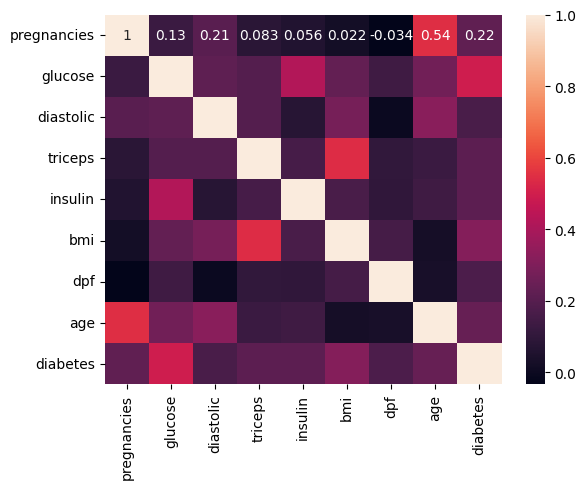

In [6]:
# Importamos la librería seaborn
import seaborn as sns

# Graficamos la matriz de correlación
sns.heatmap(diabetes_df.corr(), annot = True)

El análisis de correlación te permite entender las relaciones lineales entre las diferentes características de tu conjunto de datos. Aquí hay algunas cosas que podrías considerar al analizar la matriz de correlación del conjunto de datos de diabetes:

1. **Correlaciones fuertes entre las características y el objetivo**: Si estás intentando predecir una variable específica (por ejemplo, si un paciente tiene diabetes o no), querrás buscar características que estén fuertemente correlacionadas con esa variable objetivo. Estas podrían ser características importantes para tu modelo.

2. **Correlaciones fuertes entre las características**: Si dos características están fuertemente correlacionadas entre sí, esto podría indicar multicolinealidad, lo que puede ser problemático para algunos modelos de machine learning. Podrías considerar eliminar una de las características correlacionadas o combinarlas de alguna manera.

3. **Correlaciones débiles**: Las características que tienen una correlación débil con la variable objetivo podrían no ser muy útiles para tu modelo. Sin embargo, ten cuidado con descartar estas características demasiado rápido. Aunque no tengan una relación lineal fuerte con la variable objetivo, podrían tener una relación no lineal o podrían proporcionar información importante en combinación con otras características.

Recuerda, la correlación no implica causalidad. Solo porque dos características estén correlacionadas, no significa que una cause la otra. Además, este análisis solo considera relaciones lineales entre variables.

#### Graficamos la matriz de dispersión

Este fragmento de código está haciendo lo siguiente:

1. Importa la biblioteca matplotlib, que es una biblioteca de Python para la creación de gráficos.

2. Utiliza el método `scatter_matrix()` de pandas para dibujar una matriz de gráficos de dispersión. Cada gráfico de dispersión muestra la relación entre un par de columnas en `diabetes_df`. La diagonal de la matriz está llena de histogramas de cada columna.

3. El argumento `figsize=(15,15)` establece el tamaño de la figura a 15x15 pulgadas.

4. Utiliza `plt.show()` para mostrar la figura. Esto es necesario porque matplotlib requiere que llames a `show()` para que se muestre la figura.

Después de ejecutar este código, verás una matriz de gráficos de dispersión que muestra las relaciones entre todas las parejas de columnas en `diabetes_df`. Esto te permite ver rápidamente qué pares de columnas tienen una relación lineal fuerte o débil.

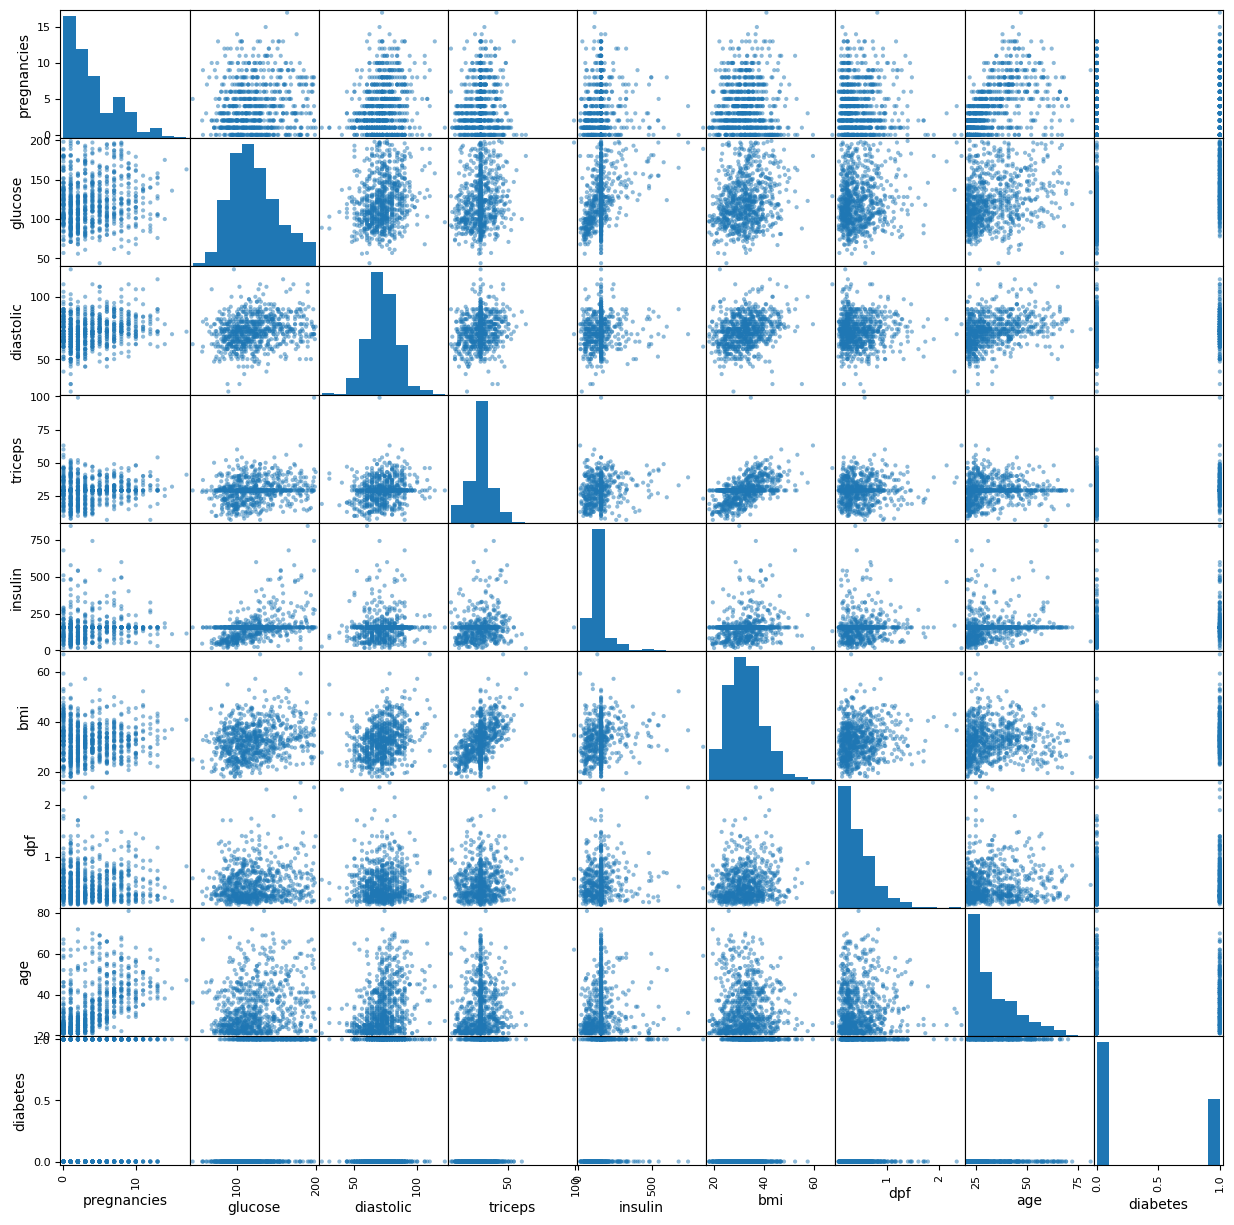

In [7]:
# Importamos la librería matplotlib
import matplotlib.pyplot as plt

# Graficamos la matriz de dispersión
pd.plotting.scatter_matrix(diabetes_df, figsize=(15,15))

# Mostramos las gráficas
plt.show()

#### Separamos las variables predictoras `X`, de las variables objetivo `y`

Preparamos el conjunto de datos para el modelado con una red neuronal, eliminamos la columna 'diabetes' es el objetivo o la variable que se está tratando de predecir.

- `diabetes_df.drop('diabetes', axis=1)`: está eliminando la columna 'diabetes' del DataFrame `diabetes_df`. La función `drop` de pandas se utiliza para eliminar filas o columnas. En este caso, estás eliminando una columna, por lo que `axis=1`. Si quisieras eliminar una fila, usarías `axis=0`. El resultado de esta operación es un nuevo DataFrame que no incluye la columna 'diabetes'. Este nuevo DataFrame se lo guarda en la variable `X_diabetes` para usarse como las características (X) en la red neuronal.

In [11]:
# Seleccionamos las columnas predictoras

X_diabetes = diabetes_df.drop('diabetes', axis=1)
X_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


Seleccionamos la columna 'diabetes' del DataFrame `diabetes_df` y la asignamos a la variable `y_diabetes`.

- `diabetes_df['diabetes']`: está seleccionando la columna 'diabetes' del DataFrame `diabetes_df`. En pandas, puedes seleccionar una sola columna de un DataFrame utilizando la sintaxis `df['column_name']`.

- Asignamos la columna 'diabetes' a la variable `y_diabetes`. Esta variable se utilizará como la variable objetivo (y) en la red neuronal.

In [12]:
# Seleccionamos la columna diabetes como variable objetivo

y_diabetes = diabetes_df['diabetes']
y_diabetes.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

#### Separamos la base de datos en conjuntos de entrenamiento y de prueba

Utilizamos la función `train_test_split` de la biblioteca sklearn en Python para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

- `from sklearn.model_selection import train_test_split`: Esta línea está importando la función `train_test_split` de la biblioteca sklearn. Esta función se utiliza para dividir conjuntos de datos en conjuntos de entrenamiento y prueba.

- `X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3)`: Esta línea está utilizando la función `train_test_split` para dividir `X_diabetes` y `y_diabetes` en conjuntos de entrenamiento y prueba. El argumento `test_size=0.3` indica que el 30% del conjunto de datos se utilizará como conjunto de prueba, y el 70% restante se utilizará como conjunto de entrenamiento.

In [13]:
# Importamos la función train_test_split de la librería sklearn
from sklearn.model_selection import train_test_split

# Dividimos la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3)

### Modelado, compilado, y entrenamiento de una red neuronal

1. Instala la biblioteca scikit-learn utilizando pip, que es un sistema de gestión de paquetes utilizado para instalar y administrar paquetes de software en Python.

2. Instala la biblioteca tensorflow utilizando pip. Tensorflow es una biblioteca de código abierto para machine learning y redes neuronales.

3. Importa tensorflow como tf. Esto significa que puedes acceder a las funciones y clases de tensorflow utilizando el prefijo tf.

4. Imprime la versión de tensorflow. Esto es útil para comprobar que tensorflow se ha instalado correctamente y para saber qué versión estás utilizando, ya que diferentes versiones pueden tener diferentes características y comportamientos.

In [ ]:
!pip install scikit-learn
!python3 -m pip install tensorflow
import tensorflow as tf
print(tf.__version__)


#### Modelamos una red neuronal simple

Importando dos módulos de la biblioteca TensorFlow, específicamente de su API de alto nivel llamada Keras. Estos módulos son comúnmente utilizados para construir redes neuronales.

Aquí está lo que hace cada parte:

- `from tensorflow.keras.models import Sequential`: Esta línea está importando el módulo `Sequential` de Keras. `Sequential` es una clase que permite crear modelos de redes neuronales donde las capas se añaden una tras otra en secuencia.

- `from tensorflow.keras.layers import Dense`: Esta línea está importando el módulo `Dense` de Keras. `Dense` es una clase que permite crear capas de neuronas completamente conectadas, que son el tipo de capa más común en las redes neuronales.

In [14]:
# Importamos los módulos necesarios para la creación del modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-29 02:45:22.499204: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Utilizamos la biblioteca TensorFlow para construir una red neuronal secuencial utilizando la API de Keras. Construiremos una red neuronal con una capa de entrada de 8 neuronas, una capa oculta de 12 neuronas, otra capa oculta de 8 neuronas, y una capa de salida de 1 neurona.

Aquí está lo que hace cada parte:

- `model = Sequential()`: Esta línea está creando un nuevo modelo secuencial. Un modelo secuencial es apropiado para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

- `model.add(Dense(12, input_dim=8, activation='relu'))`: Esta línea está añadiendo una capa densa (completamente conectada) al modelo con 12 neuronas, y está utilizando la función de activación ReLU. `input_dim=8` especifica que el número de entradas a esta capa (es decir, el número de neuronas en la capa anterior) es 8. El numero de neuronas de la capa de entrada debe coincidir con el número de variables predictoras, que en el caso de el dataset de diabetes es 8.

- `model.add(Dense(8, activation='relu'))`: Esta línea está añadiendo otra capa densa al modelo con 8 neuronas, y también está utilizando la función de activación ReLU.

- `model.add(Dense(1, activation='sigmoid'))`: Esta línea está añadiendo una capa densa final al modelo con 1 neurona, y está utilizando la función de activación sigmoide. La función de activación sigmoide es comúnmente utilizada en la capa de salida de un modelo de clasificación binaria.

In [15]:
# Creamos un modelo secuencial 
model = Sequential()

# Añadimos una capa densa con 12 neuronas y función de activación relu
model.add(Dense(12, input_dim=8, activation='relu'))

# Añadimos una capa densa con 8 neuronas y función de activación relu
model.add(Dense(8, activation='relu'))

# Añadimos una capa densa con 1 neurona y función de activación sigmoid
model.add(Dense(1, activation='sigmoid'))

/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilamos la red neuronal

Utilizaremos la función `compile` de Keras para configurar el proceso de aprendizaje de la red neuronal. Configuramos el modelo para que se entrene utilizando el optimizador Adam, la función de pérdida de entropía cruzada binaria, y para que se evalúe utilizando la precisión.

- `optimizer = 'adam'`: Esta línea está estableciendo el optimizador del modelo a 'adam'. Adam es un método de optimización que se utiliza comúnmente en redes neuronales. Ajusta la tasa de aprendizaje adaptativamente para cada parámetro.

- `loss = 'binary_crossentropy'`: Esta línea está estableciendo la función de pérdida del modelo a 'binary_crossentropy'. La entropía cruzada binaria es una función de pérdida que se utiliza en problemas de clasificación binaria. Mide la "distancia" entre las predicciones y los verdaderos resultados.

- `metrics=['accuracy']`: Esta línea está estableciendo la métrica que se utilizará para evaluar el rendimiento del modelo a 'accuracy'. La precisión es la proporción de predicciones correctas sobre el total de predicciones.

In [16]:
# Compilamos el modelo con el optimizador adam, la función de pérdida binary_crossentropy y la métrica accuracy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#### Resumen del modelo de red neuronal

El método `model.summary()` en Keras proporciona una representación textual del modelo. Muestra las capas de la red neuronal, la forma de salida de cada capa y el número de parámetros (pesos y sesgos) en cada capa. También muestra el total de parámetros en el modelo.

En este ejemplo, puedes ver que el modelo tiene tres capas. La primera capa tiene 12 neuronas y 108 parámetros, la segunda capa tiene 8 neuronas y 104 parámetros, y la tercera capa tiene 1 neurona y 9 parámetros. El total de parámetros en el modelo es 221.

In [17]:
# Visualizamos un resumen del modelo creado 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos la red neuronal

1. `model.fit()` es el método que entrena el modelo. Los argumentos `X_train` y `y_train` son los datos de entrenamiento y las etiquetas correspondientes.

2. `epochs = 150` significa que el conjunto de datos completo se pasará por la red neuronal 150 veces. Cada pasada por todo el conjunto de datos se llama una época.

3. `batch_size = 32` significa que los datos de entrenamiento se dividen en lotes de 32 ejemplos y el modelo se actualiza después de cada lote. Los lotes más pequeños pueden hacer que el modelo aprenda más rápido, pero también pueden hacer que el aprendizaje sea menos estable. Los lotes más grandes pueden hacer que el aprendizaje sea más estable, pero también pueden hacer que el aprendizaje sea más lento.

Después de ejecutar este código, el modelo habrá sido entrenado en los datos de `X_train` y `y_train` durante 150 épocas, y estará listo para hacer predicciones.

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento, especificando el número de épocas y el tamaño del batch
model.fit(X_train, y_train, epochs = 150, batch_size = 32)

### Evaluación del modelo

#### Evaluación de la precisión del modelo

Evaluamos el rendimiento de un modelo de red neuronal en Keras tanto en los datos de entrenamiento como en los datos de prueba e imprimos la precisión de la clasificación en ambos conjuntos de datos.

- `scores = model.evaluate(X_train, y_train, verbose=False)`: Esta línea está evaluando el modelo en los datos de entrenamiento. `model.evaluate` devuelve la pérdida del modelo y las métricas en los datos proporcionados. 

    En este caso, `scores[0]` sería la pérdida y `scores[1]` sería la precisión, ya que se especificó `metrics=['accuracy']` durante la compilación del modelo.

- `print("Precisión en la fase de entrenamiento: %.2f%%" % (scores[1]*100))`: Esta línea está imprimiendo la precisión del modelo en los datos de entrenamiento representado en una cadena de formato. El `%` indica un punto de inserción para un valor. El `.2f` especifica un número de punto flotante con dos decimales. El `%%` se utiliza para imprimir un solo signo de porcentaje.

- `scores = model.evaluate(X_test, y_test, verbose=False)`: Esta línea está evaluando el modelo en los datos de prueba.

- `print("Precisión en la fase de prueba: %.2f%%" % (scores[1]*100))`: Esta línea está imprimiendo la precisión del modelo en los datos de prueba.

In [19]:
# Evaluación del modelo con los datos de entrenamiento
scores = model.evaluate(X_train, y_train, verbose=False)
print("Precisión en la fase de entrenamiento: %.2f%%" % (scores[1]*100))

# Evaluación del modelo con los datos de prueba
scores = model.evaluate(X_test, y_test, verbose=False)
print("Precisión en la fase de prueba: %.2f%%" % (scores[1]*100))

Precisión en la fase de entrenamiento: 70.95%
Precisión en la fase de prueba: 69.26%


#### Usamos el modelo para hacer predicciones

Seleccionamos una fila específica de un DataFrame de pandas para realizar una predicción.
 
- `iloc[9]` selecciona la décima fila del DataFrame `X_test` (la indexación en Python comienza en 0), y la asigna a la variable `persona_de_prueba`.

In [20]:
# Seleccionamos una persona de la base de datos de prueba para realizar una predicción
persona_de_prueba = X_test.iloc[9]
persona_de_prueba

pregnancies      5.000000
glucose        116.000000
diastolic       74.000000
triceps         29.153420
insulin        155.548223
bmi             25.600000
dpf              0.201000
age             30.000000
Name: 5, dtype: float64

Utilizamos el modelo de la red neuronal entrenada para hacer una predicción basada en los datos de una "persona de prueba".

- `persona_de_prueba.values` convierte la fila del DataFrame de pandas en un array de numpy. `reshape(1,8)` cambia la forma del array a un array bidimensional con 1 fila y 8 columnas. Esto se hace porque el método `predict` de Keras espera un array bidimensional (es decir, un array de arrays), donde cada sub-array es un conjunto de características para hacer una predicción.

- `prediccion = model.predict(...)`: Esta línea utiliza el método `predict` del modelo para hacer una predicción basada en las características de la "persona de prueba". La predicción se asigna a la variable `prediccion`.

In [21]:
# Hacemos una predicción con el modelo entrenado
prediccion = model.predict(persona_de_prueba.values.reshape(1,8))
prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.2025495]], dtype=float32)

Comparamos la predicción de un modelo de aprendizaje automático con los datos reales para una "persona de prueba".

- `if prediccion >= 0.5:`: Aquí, `prediccion` es la salida de un modelo de aprendizaje automático. Si la salida es mayor o igual a 0.5, se interpreta como una predicción de que la persona tiene diabetes.

- `print('Según la predicción de la red neuronal: La persona tiene diabetes')`: Esta línea se ejecuta si la condición del `if` es verdadera, es decir, si la predicción es mayor o igual a 0.5.

- `else:`: Esta parte del código se ejecuta si la condición del `if` es falsa, es decir, si la predicción es menor a 0.5.

- `print('Según la predicción de la red neuronal: La persona no tiene diabetes')`: Esta línea se ejecuta si la condición del `if` es falsa.

- `if y_test.iloc[9] == 1:`: Aquí, `y_test` es un DataFrame de pandas que contiene los datos reales. `y_test.iloc[9]` selecciona la décima fila del DataFrame. Si el valor en esta fila es 1, se interpreta como que la persona tiene diabetes.

- `print('Según la base de datos de prueba: La persona tiene diabetes')`: Esta línea se ejecuta si la condición del `if` es verdadera, es decir, si el valor en la décima fila de `y_test` es 1.

- `else:`: Esta parte del código se ejecuta si la condición del `if` es falsa, es decir, si el valor en la décima fila de `y_test` no es 1.

- `print('Según la base de datos de prueba: La persona no tiene diabetes')`: Esta línea se ejecuta si la condición del `if` es falsa.

In [22]:
# Comprobamos si la persona tiene diabetes o no según la predicción
if prediccion >= 0.5:
    print('Según la predicción de la red neuronal: La persona tiene diabetes')
else:
    print('Según la predicción de la red neuronal: La persona no tiene diabetes')
    
# Comprobamos si la persona tiene diabetes o no según la base de datos
if y_test.iloc[9] == 1:
    print('Según la base de datos de prueba: La persona tiene diabetes')
else:
    print('Según la base de datos de prueba: La persona no tiene diabetes')


Según la predicción de la red neuronal: La persona no tiene diabetes
Según la base de datos de prueba: La persona no tiene diabetes


#### Guardamos el modelo para usarlo en producción

In [23]:
# Guardamos el modelo en un archivo
model.save('modelo_diabetes.keras')

In [24]:
# Cargamos el modelo desde el archivo
from tensorflow.keras.models import load_model
modelo_cargado = load_model('modelo_diabetes.keras')

In [25]:
# Hacemos una predicción con el modelo cargado
prediccion_modelo_cargado = modelo_cargado.predict(persona_de_prueba.values.reshape(1,8))

# Comprobamos si la persona tiene diabetes o no según la predicción del modelo cargado
if prediccion_modelo_cargado >= 0.5:
    print('Según la predicción del modelo cargado: La persona tiene diabetes')
else:
    print('Según la predicción del modelo cargado: La persona no tiene diabetes')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Según la predicción del modelo cargado: La persona no tiene diabetes


### **Conclusiones:**

Este Jupyter Notebook presenta un análisis y modelado de un conjunto de datos de diabetes utilizando una red neuronal en TensorFlow. Se realizó un preprocesamiento de datos efectivo, manejando los valores faltantes y discutiendo la posibilidad de tratar los valores atípicos. A través del análisis exploratorio de datos, se revelaron las correlaciones entre las diferentes características, proporcionando una visión valiosa para la selección de características en el modelado con la red neuronal. La red neuronal se entrenó durante 150 épocas con un tamaño de lote de 32, lo que demuestra un esfuerzo considerable en el ajuste del modelo a los datos. En general, este notebook proporciona una base sólida para el análisis y modelado de datos de diabetes, y muestra el potencial de las redes neuronales para la predicción de enfermedades crónicas como la diabetes.